Sona Davis

# Tutorial 2: How to find a AGNs?

Introduction to Active Galactic Nuclei

## Part 1- BPT Diagram

1) Use SDSS DR18 SQL search to find all galaxies which have only
the narrow emission lines (FWHM<500 km/s), high median signal
to noise ratio in g band (S/N>40), and fluxes of lines: [O III] 5007,
Hβ, Hα and [N II] 6583 larger than 5 e-17 erg/s/cm^2. Set criteria
so that the fluxes are larger than errors in flux multiplied with 5 in
order to get good results. SQL output should be the fluxes of
these lines.

Optionally: find classes and subclasses for these object from the SpecObj
View and compare it with your BPT diagram.

In [65]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file
# data set of galaxies downloaded from SDSS by using SQL query
import csv
data1 = pd.read_csv("/home/user/Documents/AGN/T2/SQL T2 bpt 1.csv")
#data1 = pd.read_csv('/home/user/Documents/AGN/T2/SQL T2 bpt 1.csv', delimiter='\s+', header=0, index_col=None)

data1

,specObjID,plate,mjd,fiberID,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,h_alpha_flux_err,h_beta_flux_err,oiii_5007_flux_err,nii_6584_flux_err,snMedian_g
0,683536182147049472,607,52368,418,217.054230,61.187713,0.036817,2903.61100,527.20050,79.64045,2446.31500,20.138560,9.412522,7.102148,16.016700,46.73903
1,675686218024904704,600,52317,532,188.761030,66.375946,0.046852,2202.99000,464.61680,95.73929,1139.37600,23.745730,8.678604,7.555988,14.344090,44.50981
2,1863508990709753856,1655,53523,526,239.682090,26.818150,0.014155,13121.21000,2184.10000,642.92190,7064.97400,82.791000,20.755470,13.533320,43.072960,49.82107
3,609142668794030080,541,51959,112,114.755990,31.914740,0.040488,105.81120,29.39003,48.42820,109.34710,5.648892,3.904398,4.203235,5.335415,56.06063
4,443611192460601344,394,51913,24,14.072866,-0.369701,0.044725,45.11355,14.50603,25.71370,59.13488,3.353954,2.892773,3.758958,4.125110,55.49555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2968047045270595584,2636,54082,636,37.086905,0.687233,0.041070,130.06970,32.74776,17.25338,88.33881,1.994057,1.324268,1.473576,1.862136,45.58710
979,3240444460408006656,2878,54465,380,21.607945,-8.564201,0.017801,114.11850,52.22805,68.39828,37.00938,4.070751,3.450207,4.303103,3.861378,57.26613
980,3247252637430605824,2884,54526,572,245.913300,50.969590,0.019899,465.74220,131.89630,566.77200,712.15860,11.176370,6.409513,9.610229,11.825800,45.43973
981,532713690898655232,473,51929,593,140.902100,2.136491,0.016913,213.78470,59.08947,93.88316,370.20160,5.650489,3.866002,5.273432,7.073739,60.02078


In [69]:
#data1 = pd.read_csv('/home/user/Documents/AGN/T2/SQL T2 bpt 1.csv', delimiter=r'\s+', header=0, index_col=None)
#data1

2) For the obtained sample make the diagnostic BPT (Baldwin,
Philips and Terlevich) diagram. This diagram determines the
dominant ionization source for the objects: accretion disk (AGN)
or hot emission stars (H II - star-burst region). For the BPT
diagram use the flux ratios of the lines: [O III] 5007/Hβ vs. [N
II]6583/Hα.

Optionally: Draw the Schawinski (2007) line that separates LINER and Seyfert galaxies

In [67]:
#extracting the flux values 
Ha = data1['h_alpha_flux'] 
Hb = data1['h_beta_flux'] 
oiii = data1['oiii_5007_flux'] 
nii = data1['nii_6584_flux'] 


In [71]:
#ratios of oiii/H beta line flux 
l_oiii_Hb = []
oiii_Hb = data1['oiii_5007_flux'] / data1['h_beta_flux'] 
#oiii_Hb
l_oiii_Hb = np.log10(oiii_Hb)
#l_oiii_Hb
data1['log ([OIII]\u03BB5007/H\u03B2)'] = l_oiii_Hb 

In [73]:
#ratios of nii/H alpha line flux 
l_nii_Ha = []
nii_Ha = data1['nii_6584_flux'] / data1['h_alpha_flux']
#nii_Ha
l_nii_Ha = np.log10(nii_Ha)
#l_nii_Ha
data1['log ([N II]\u03BB6584/H\u03B1)'] = l_nii_Ha


(-4.0, 2.0)

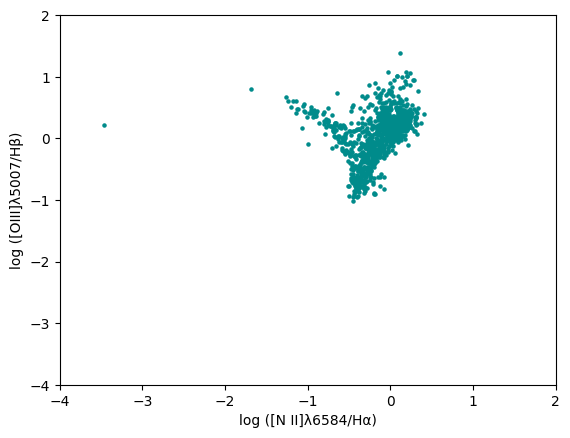

In [101]:
#plot BPT diagram
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.xlim(-4,2)
plt.ylim(-4,2)

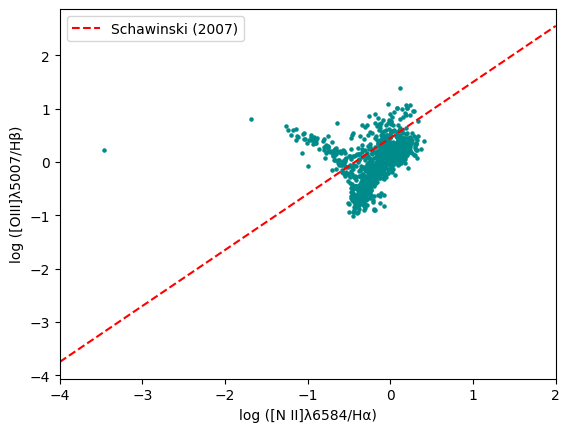

In [99]:
import numpy as np
import matplotlib.pyplot as plt


plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.xlim(-4, 2)
#plt.ylim(-2,2)

 # Define the x-range for the line:
x_vals = np.linspace(-4, 2, 500)
schawinski_line = 1.05 * x_vals + 0.45

# Plot the Schawinski line:
plt.plot(x_vals, schawinski_line, 'r--', label='Schawinski (2007)')

plt.legend()
plt.show()

